<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [16]:
sns.set_style("darkgrid")
sns.set(font_scale=1.1)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [128]:
!ls '../datasets/' 

README.md                               countrywise_airtraffic_tofrom_india.csv
airlinewise_airtraffic_tofrom_india.csv fifa19_players.csv
citywise_airtraffic_tofrom_india.csv


In [3]:
countrywise = pd.read_csv('../datasets/countrywise_airtraffic_tofrom_india.csv', error_bad_lines=False)
airlinewise = pd.read_csv('../datasets/airlinewise_airtraffic_tofrom_india.csv', error_bad_lines= False)

In [4]:
countrywise['NET TRAFFIC TO INDIA'] = countrywise['PASSENGERS TO INDIA'] - countrywise['PASSENGERS FROM INDIA']
countrywise['TOTAL TRAFFIC'] = countrywise['PASSENGERS TO INDIA'] + countrywise['PASSENGERS FROM INDIA']
countrywise.head()

,YEAR,QUARTER,COUNTRY NAME,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,NET TRAFFIC TO INDIA,TOTAL TRAFFIC
0,2015,Q1,AFGHANISTAN,37194,32721,96.7,676.4,4473,69915
1,2015,Q1,AUSTRALIA,16676,19075,89.7,423.7,-2399,35751
2,2015,Q1,AUSTRIA,13318,15529,563.8,707.0,-2211,28847
3,2015,Q1,BAHRAIN,114087,133527,585.7,1909.5,-19440,247614
4,2015,Q1,BANGLADESH,76357,75673,624.1,1052.9,684,152030


In [5]:
airlinewise['NET TRAFFIC TO INDIA'] = airlinewise['PASSENGERS TO INDIA'] - airlinewise['PASSENGERS FROM INDIA']
airlinewise['TOTAL TRAFFIC'] = airlinewise['PASSENGERS TO INDIA'] + airlinewise['PASSENGERS FROM INDIA']
airlinewise.head()

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,NET TRAFFIC TO INDIA,TOTAL TRAFFIC
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302,-15344.0,533096.0
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000,-21019.0,212181.0
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000,-6100.0,142324.0
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515,-11263.0,652969.0
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680,-4586.0,80350.0


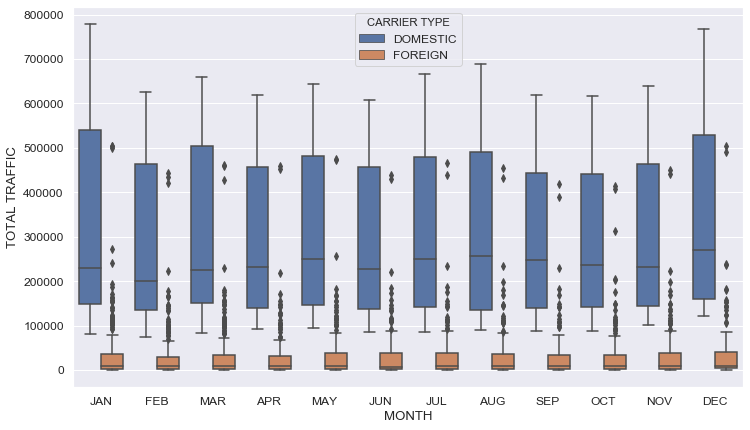

In [10]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'MONTH', y = 'TOTAL TRAFFIC', data=airlinewise, hue = 'CARRIER TYPE' )

In [11]:
only_international = airlinewise.loc[airlinewise['CARRIER TYPE'] == 'FOREIGN']

airlines = only_international.groupby(by = 'AIRLINE NAME').sum()
airlines = airlines[['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA', 'NET TRAFFIC TO INDIA', 'TOTAL TRAFFIC']]
airlines.sort_values(by = 'TOTAL TRAFFIC', ascending = False, inplace = True)
airlines.reset_index(inplace = True)
airlines.head()

,AIRLINE NAME,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,NET TRAFFIC TO INDIA,TOTAL TRAFFIC
0,EMIRATES AIRLINE,5981862.0,6214850,-232988.0,12196712.0
1,ETIHAD AIRLINES,2715962.0,2813097,-97135.0,5529059.0
2,AIR ARABIA,1964928.0,2031394,-66466.0,3996322.0
3,OMAN AIR,1758656.0,1802529,-43873.0,3561185.0
4,QATAR AIRWAYS,1654189.0,1646102,8087.0,3300291.0


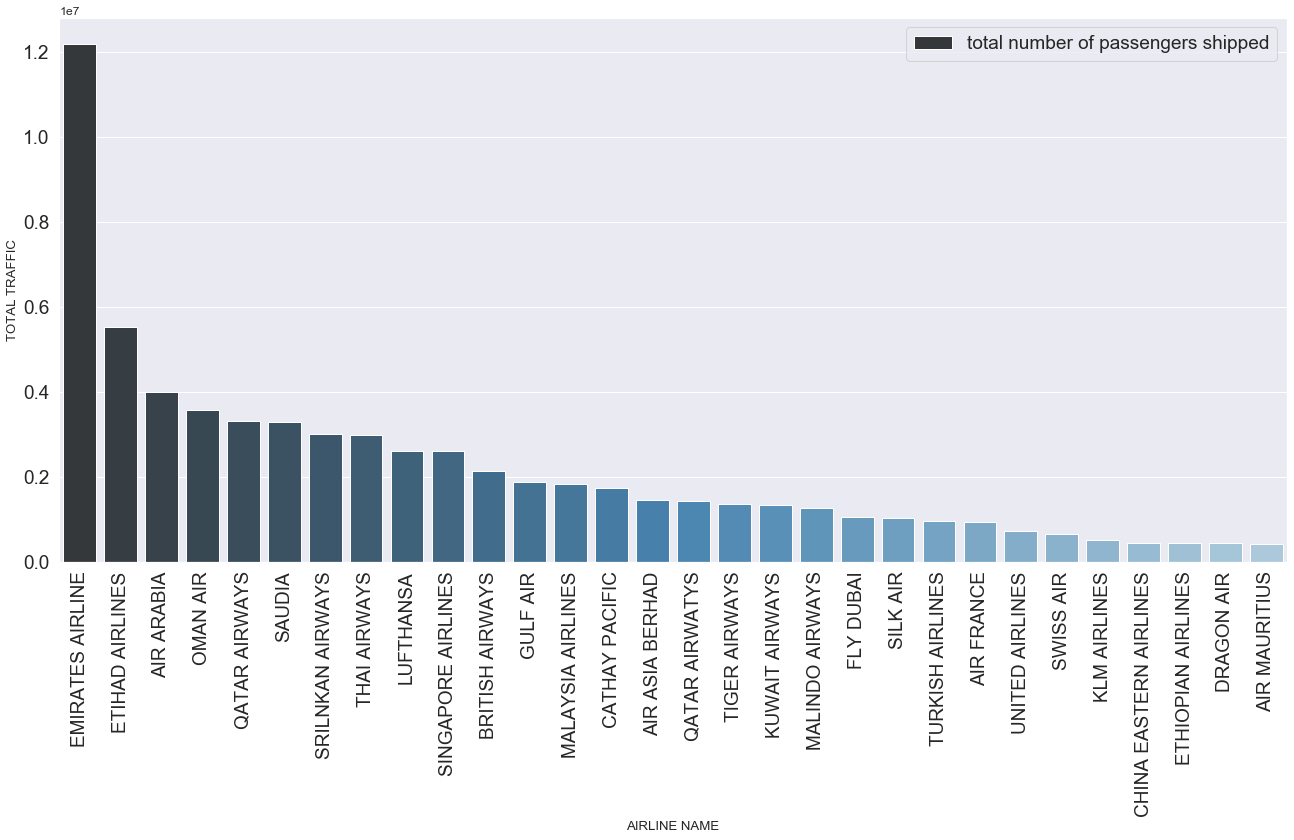

In [19]:
plt.figure(figsize=(22, 10))
sns.barplot(x='AIRLINE NAME', y='TOTAL TRAFFIC', data=airlines.head(
    30), label='total number of passengers shipped', palette="Blues_d")
plt.legend(fontsize = 'x-large')
plt.xticks(fontsize = 'x-large', rotation=90)
plt.yticks(fontsize = 'x-large')
plt.show()

In [23]:
!jupyter nbconvert --to html html-saves/15.2_Exploring_data_with_Seaborn_plot

[NbConvertApp] WARNING | pattern 'html-saves/15.2_Exploring_data_with_Seaborn_plot' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
   